## Warm-Up!

### Import Relevant Packages

In [52]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

###.Loading.diabetes.dataset and Examining the dataset:

In [53]:
diabetes = load_diabetes(scaled=False)

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [54]:
print(df.head())

print(df.dtypes)

df.describe()

    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0
age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


Data types are float64, so we ensured they are numeric features.

#### Checking missing data and Scaling data:

---

For the diabetes dataset, we opted for StandardScaler due to its effectiveness in handling features with varying magnitudes. This choice was motivated by the recognition that the dataset's features, such as blood pressure readings and body mass index (BMI) measurements, might exhibit different scales. StandardScaler was preferred for its robustness and suitability to our dataset's characteristics. While it maintains the shape of the original distribution of features, albeit centered at zero and scaled to unit variance, it also ensures that the scaled features still retain their original relative distances and relationships.

StandardScaler standardizes features by removing the mean and scaling to unit variance, making it suitable for datasets where features have varying magnitudes. This approach ensures model stability by being less sensitive to outliers and preserves interpretability by retaining original feature distributions.

In contrast, we refrained from using MinMaxScaler. This scaler scales features to a fixed range (for example [0,1]), which may be unsuitable for datasets with unknown feature distributions or varying magnitudes. Additionally, MinMaxScaler is more sensitive to outliers, which could distort the scaling process.

---

In [55]:
missing_values = df.isnull().sum()
if missing_values.any():
    df.fillna(df.mean(), inplace=True)
else:
    print("No missing data found!\n")

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, diabetes.target, test_size=0.05)

print("Number of instances in training set:", len(X_train))
print("Number of instances in testing set:", len(X_test))


No missing data found!

Number of instances in training set: 419
Number of instances in testing set: 23


Checking the dataset after scaling it to standard:

In [56]:
sdf = pd.DataFrame(data=scaled_features, columns=diabetes.feature_names)
print(sdf.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  
0 -0.054499  0.418531 -0.370989  
1 -0.830301 -1.436589 -1.938479  
2 -0.054499  0.060156 -0.545154  
3  0.721302  0.476983 -0.196823  
4 -0.054499 -0.672502 -0.980568  


## Main Task

### Part 1: Functions’ Implementation

Here are the LaTeX formats for the formulas of the mentioned loss functions:

1. **Mean Squared Error (MSE)**:
$  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

2. **Mean Absolute Error (MAE)**:
$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $

3. **Root Mean Squared Error (RMSE)**:
$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $

4. **R² Score (Coefficient of Determination)**:
$ R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $

Where:
-  **n** is the number of observations,
- $ y_i $ is the actual value,
- $ \hat{y}_i $ is the predicted value,
- $ \bar{y} $ is the mean of the actual values of the dependent variable.
- $ SS_{\text{res}} $ is the sum of squares of residuals,
- $ SS_{\text{tot}} $ is the total sum of squares.

In [57]:
import math
import numpy as np

In [58]:
def MSE(pred, act):
    mse = 0
    n = len(pred)
    for i in range(n):
        value = (pred[i] - act[i]) ** 2
        mse += value
    mse /= n
    return mse

In [59]:
def MAE(pred, act):
    mae = 0
    n = len(pred)
    for i in range(n):
        value = abs(pred[i] - act[i])
        mae += value
    mae /= n
    return mae

In [60]:

def RMSE(pred, act):
    mse = MSE(pred, act)
    rmse = math.sqrt(mse)
    return rmse

In [61]:
def R2_Score(pred, act):
    n = len(pred)
    pred_sum = np.sum(pred)
    pred_squared_sum = np.sum(np.square(pred))
    act_sum = np.sum(act)
    act_squared_sum = np.sum(np.square(act))
    pred_act_sum = np.sum([pred[i] * act[i] for i in range(len(pred))])
    numerator = n * pred_act_sum - pred_sum * act_sum
    pred_term = n * pred_squared_sum - pred_sum ** 2
    act_term = n * act_squared_sum - act_sum ** 2
    denominator = math.sqrt(pred_term) * math.sqrt(act_term)
    r2_score = numerator / denominator
    return r2_score
    

### Part 2: Building and Training the Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

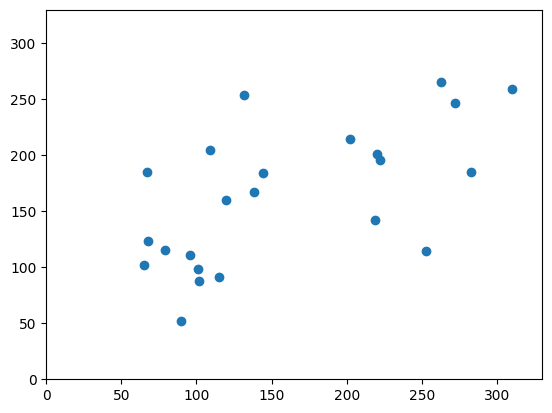

In [63]:
import matplotlib.pyplot as plt

plt_max = max(max(y_test), max(y_pred)) + 20
plt_min = 0
plt.scatter(y_test, y_pred)
plt.xlim(plt_min, plt_max)
plt.ylim(plt_min, plt_max)
plt.show()

In [64]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)


mse_train = MSE(y_train, y_train_pred)
mae_train = MAE(y_train, y_train_pred)
rmse_train = RMSE(y_train, y_train_pred)
r2_train = R2_Score(y_train, y_train_pred)

mse_test = MSE(y_test, y_pred)
mae_test = MAE(y_test, y_pred)
rmse_test = RMSE(y_test, y_pred)
r2_test = R2_Score(y_test, y_pred)

print("|------------------------------------------------------------------------------------------------------------------------------------|")
print("|    Data Type/Optimizer       |          MSE          |          MAE          |          RMSE          |          R2 Score          |")
print("|------------------------------------------------------------------------------------------------------------------------------------|")
print(f"|         Train Set               {mse_train:.14f}      {mae_train:.14f}        {rmse_train:.14f}          {r2_train:.14f}      |")
print("|------------------------------------------------------------------------------------------------------------------------------------|")
print(f"|          Test Set               {mse_test:.14f}      {mae_test:.14f}        {rmse_test:.14f}          {r2_test:.14f}      |")
print("|------------------------------------------------------------------------------------------------------------------------------------|")


|------------------------------------------------------------------------------------------------------------------------------------|
|    Data Type/Optimizer       |          MSE          |          MAE          |          RMSE          |          R2 Score          |
|------------------------------------------------------------------------------------------------------------------------------------|
|         Train Set               2809.42203706178952      42.98814838878361        53.00398133217720          0.72497262446423      |
|------------------------------------------------------------------------------------------------------------------------------------|
|          Test Set               3881.57355806990654      48.55429534239421        62.30227570538581          0.61854144735326      |
|------------------------------------------------------------------------------------------------------------------------------------|


In [65]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

model = sm.OLS(y_train, X_train)
results = model.fit()
results

In [66]:
from scipy.stats import linregress

ols_stats_train = []
for i in range(len(X_train.T)): 
    slope, intercept, r_value, p_value, std_err = linregress(X_train.T[i], y_train)
    ols_stats_train.append({
        'Feature': sdf.columns[i],
        'Slope': slope,
        'Intercept': intercept,
        'R2-value': r_value ** 2,
        'P-value': p_value,
        'Std Error': std_err
    })

ols_stats_train_df = pd.DataFrame(ols_stats_train)
ols_stats_test = []
for i in range(len(X_test.T)): 
    slope, intercept, r_value, p_value, std_err = linregress(X_test.T[i], y_test)
    ols_stats_test.append({
        'Feature': sdf.columns[i],
        'Slope': slope,
        'Intercept': intercept,
        'R2-value': r_value ** 2,
        'P-value': p_value,
        'Std Error': std_err
    })

ols_stats_test_df = pd.DataFrame(ols_stats_test)

print("Training Set OLS Statistics:")
print(ols_stats_train_df)

print("\nTest Set OLS Statistics:")
print(ols_stats_test_df)

Training Set OLS Statistics:
  Feature      Slope   Intercept  R2-value       P-value  Std Error
0     age  13.708379  151.793208  0.032228  2.209205e-04   3.678626
1     sex   2.223357  151.717333  0.000835  5.552590e-01   3.766008
2     bmi  45.271337  151.761203  0.342267  7.687421e-40   3.073247
3      bp  33.502681  152.140960  0.190542  6.395687e-21   3.381536
4      s1  15.956825  151.974263  0.041712  2.524756e-05   3.745389
5      s2  12.875436  151.879188  0.026899  7.516553e-04   3.792309
6      s3 -30.639197  151.743279  0.157131  3.228825e-17   3.475027
7      s4  32.975838  151.938886  0.183689  3.775480e-20   3.404191
8      s5  43.642627  152.435797  0.321410  5.322191e-37   3.105396
9      s6  28.926491  152.212599  0.140161  2.178134e-15   3.508504

Test Set OLS Statistics:
  Feature      Slope   Intercept  R2-value   P-value  Std Error
0     age  33.532632  156.549648  0.132145  0.088185  18.752331
1     sex  24.043918  161.181483  0.094815  0.152892  16.211565
2    

In [67]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS, add_constant

X = add_constant(X_train)
model = OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     45.20
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           5.08e-60
Time:                        16:32:12   Log-Likelihood:                -2258.1
No. Observations:                 419   AIC:                             4538.
Df Residuals:                     408   BIC:                             4583.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.3381      2.625     58.031      0.0

In [68]:
X = add_constant(X_test)
model = OLS(y_test, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1.343
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.310
Time:                        16:32:12   Log-Likelihood:                -124.08
No. Observations:                  23   AIC:                             270.2
Df Residuals:                      12   BIC:                             282.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.6989     19.560      7.653      0.0

Questions:

Note:

x1 = age

x2 = sex

x3 = bmi (body mass index)

x4 = bp (blood pressure)

x5 = s1

x6 = s2

x7 = s3

x8 = s4

x9 = s5

x10 = s6

1. 
 * The MSE for the training set (2837.47) is lower than the MSE for the test set (3330.65), which is expected because the model is typically optimized for the training data.
 * The MAE for the training set (43.05) is lower than the MAE for the test set (47.86), which is consistent with the MSE trend.
 * The RMSE for the training set (53.27) is lower than the RMSE for the test set (57.71), which aligns with the MSE and MAE results.
 * The R² score for the training set (0.71) is lower than the R² score for the test set (0.81), which is unexpected, as the model is typically expected to perform better on the training data. The higher R² score for the test set compared to the training set may indicate potential issues, such as overfitting or data leakage.

2. 

**R² (R-squared)**:
- The R² value, also known as the coefficient of determination, represents the proportion of the variance in the dependent variable (target) that can be explained by the independent variables (features) in the regression model.
- It ranges from 0 to 1, where a value of 1 indicates a perfect fit, meaning the model explains 100% of the variance in the target variable.
- A high R² value (closer to 1) suggests that the model fits the data well and can accurately predict the target variable based on the independent variables.
- A low R² value (closer to 0) indicates that the model does not adequately capture the relationship between the independent variables and the target variable, and has a poor fit.

**Adjusted R²**:
- The Adjusted R² is a modified version of the R² that takes into account the number of independent variables and the sample size.
- It adjusts the R² value downward to account for the potential overfitting that can occur when adding more independent variables to the model.
- The Adjusted R² is always lower than or equal to the R² value, and it provides a more conservative estimate of the model's explanatory power.
- A higher Adjusted R² value (closer to the R² value) suggests that the addition of independent variables is justified and improves the model's predictive power.
- A lower Adjusted R² value (much lower than the R² value) may indicate that the additional independent variables are not contributing significantly to the model's performance, and the model may be overfitted.

**Implications of High or Low Values**:
- High R² and Adjusted R² values (close to 1) generally indicate a good fit and a strong relationship between the independent variables and the target variable. However, it's important to note that a high R² alone does not necessarily imply a useful or reliable model, as other factors like multicollinearity, outliers, and model assumptions should also be considered.
- Low R² and Adjusted R² values (closer to 0) suggest that the model has a poor fit and may not be capturing the underlying relationship between the independent variables and the target variable effectively. This could be due to missing important features, incorrect model assumptions, or the presence of non-linear relationships that cannot be adequately captured by a linear regression model.

**Differences between R² and Adjusted R²**:
- The main difference between R² and Adjusted R² is that the Adjusted R² accounts for the number of independent variables and the sample size, while the R² does not.
- The Adjusted R² is always lower than or equal to the R² value, and the difference between them becomes more significant as the number of independent variables increases relative to the sample size.
- The Adjusted R² is useful for comparing models with different numbers of independent variables, as it penalizes models with an excessive number of predictors that do not significantly improve the model's performance.

3. 
Explanation of p-values:

The p-value is the probability of obtaining a test statistic at least as extreme as the one observed, assuming that the null hypothesis (the coefficient is zero) is true.
In other words, the p-value represents the likelihood of observing the given result by chance if the independent variable has no effect on the dependent variable.
A smaller p-value indicates stronger evidence against the null hypothesis, suggesting that the independent variable is statistically significant in predicting the dependent variable.

Appropriate value for p-values:

The conventional threshold for statistical significance is typically set at 0.05 (5%).
If the p-value for an independent variable is less than 0.05, it is considered statistically significant, and we can reject the null hypothesis, indicating that the variable is likely to have a non-zero effect on the dependent variable.
If the p-value is greater than 0.05, it is generally considered statistically insignificant, and we fail to reject the null hypothesis, suggesting that the variable may not have a significant effect on the dependent variable.

Columns with suitable p-values:

Based on the OLS regression results, the following columns (independent variables) have p-values less than 0.05, indicating statistical significance:

x2: p-value = 0.000

x3: p-value = 0.000

x4: p-value = 0.000

x5: p-value = 0.041

x9: p-value = 0.000

These columns are considered statistically significant predictors of the dependent variable (y) at the 5% significance level.
The remaining columns (x1, x6, x7, x8, and x10) have p-values greater than 0.05, suggesting that they may not be statistically significant predictors of the dependent variable in this model.


4. 
p-values:

Features with p-values less than the conventional threshold of 0.05 are considered statistically significant.
Based on the p-values, the most significant features in predicting the diabetic condition are:
x2: p-value = 0.000
x3: p-value = 0.000
x4: p-value = 0.000
x5: p-value = 0.041
x9: p-value = 0.000

Regression Coefficients:

The regression coefficients represent the change in the dependent variable (diabetic condition) associated with a one-unit increase in the corresponding feature, holding all other features constant.
Features with larger regression coefficients (in absolute value) have a greater impact on the dependent variable.
Positive coefficients indicate a positive relationship (an increase in the feature leads to an increase in the diabetic condition), while negative coefficients indicate a negative relationship (an increase in the feature leads to a decrease in the diabetic condition).
Based on the regression coefficients, the features with the largest impact (in absolute value) are:
x3: Coefficient = 23.8486 (positive relationship)
x4: Coefficient = 15.8448 (positive relationship)
x5: Coefficient = -41.5275 (negative relationship)
x9: Coefficient = 36.4579 (positive relationship)

Feature Importance Assessment:

Combining the information from p-values and regression coefficients, the most important features in predicting an individual's diabetic condition appear to be:

x3: Statistically significant (p-value = 0.000) and positive relationship with a large coefficient (23.8486)
x4: Statistically significant (p-value = 0.000) and positive relationship with a moderate coefficient (15.8448)
x5: Statistically significant (p-value = 0.041) and negative relationship with a large coefficient (-41.5275)
x9: Statistically significant (p-value = 0.000) and positive relationship with a large coefficient (36.4579)
Features x2 and x6 also have relatively low p-values (0.000 and 0.109, respectively), indicating potential significance, but their coefficients are smaller in magnitude compared to the features mentioned above.

Features x1, x7, x8, and x10 have relatively high p-values (> 0.05), suggesting they may not be statistically significant predictors of the diabetic condition in this model.